In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from keras.layers import  Dense, Flatten, Input,Dropout
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import os
from tqdm import tqdm
import cv2
import warnings
warnings.filterwarnings("ignore")
from keras.models import Sequential,load_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/ML/FaceMask/dataset/
%ls

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1XDte2DL2Mf_hw4NsmGst7QtYoU7sMBVG/dataset
with_mask/  without_mask/


In [ ]:
directory = r"/content/drive/MyDrive/ML/FaceMask/dataset"
categories = ["with_mask" , 'without_mask']

In [ ]:
print("loading images")
data = []
labels = []

# Loading image via split category to array
for category in categories:
    path = os.path.join(directory , category)
    print("\n\n category : " + category +"\n")
    for img in tqdm(os.listdir(path)):
        img_path = os.path.join(path , img)
        try:
          image = load_img(img_path , target_size=(224 , 224))
          image = img_to_array(image)
          image = preprocess_input(image)
          
          data.append(image)
          labels.append(category)
        except:
          print("")

loading images


 category : with_mask



 52%|█████▏    | 1000/1916 [04:39<04:23,  3.47it/s]

  0%|          | 0/1919 [00:00<?, ?it/s]



 category : without_mask



 52%|█████▏    | 1000/1919 [04:08<02:53,  5.29it/s]

100%|██████████| 1919/1919 [07:55<00:00,  4.04it/s]


In [ ]:
#perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [ ]:
data = np.array(data , "float32")
labels = np.array(labels)


In [ ]:
#splitting the data
(Xtrain , Xtest , ytrain , ytest) = train_test_split(data , labels , test_size = 0.20 , random_state = 42 , stratify = labels)

In [ ]:
#construct the training image generator for data augmentation
aug = ImageDataGenerator(rotation_range=20,
                        zoom_range=0.15,
                        width_shift_range=0.2,
                        height_shift_range=0.2,
                        shear_range=0.15,
                        horizontal_flip=True,
                        fill_mode = "nearest")


In [ ]:
model=Sequential([
        Input(shape=(224,224,3)),
        Conv2D(32,3,activation='relu'),
        MaxPool2D(pool_size=2),
        Conv2D(32,3,activation='relu'),
        MaxPool2D(pool_size=3),
        Dropout(0.2),
        Flatten(),
        Dense(256,activation='linear'),
        Dense(2,activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 36, 36, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               1

In [ ]:
#compiling the model
epochs = 20
batch_size = 32
ler=1e-4

opt = Adam(lr = ler , decay = ler / epochs)
model.compile(loss = "binary_crossentropy" , optimizer = opt , metrics=["accuracy"])

In [ ]:
history = model.fit(aug.flow(Xtrain , ytrain , batch_size=batch_size),epochs = epochs)

Epoch 1/20
96/96 [==============================] - 39s 342ms/step - loss: 0.4844 - accuracy: 0.7766
Epoch 2/20
96/96 [==============================] - 33s 344ms/step - loss: 0.2980 - accuracy: 0.8866
Epoch 3/20
96/96 [==============================] - 33s 345ms/step - loss: 0.2714 - accuracy: 0.9076
Epoch 4/20
96/96 [==============================] - 33s 344ms/step - loss: 0.2981 - accuracy: 0.8780
Epoch 5/20
96/96 [==============================] - 33s 345ms/step - loss: 0.2788 - accuracy: 0.8987
Epoch 6/20
96/96 [==============================] - 33s 346ms/step - loss: 0.2720 - accuracy: 0.9046
Epoch 7/20
96/96 [==============================] - 33s 342ms/step - loss: 0.2771 - accuracy: 0.8925
Epoch 8/20
96/96 [==============================] - 33s 342ms/step - loss: 0.2682 - accuracy: 0.8987
Epoch 9/20
96/96 [==============================] - 33s 340ms/step - loss: 0.2431 - accuracy: 0.9097
Epoch 10/20
96/96 [==============================] - 33s 341ms/step - loss: 0.2322 - accura


--------chart---------


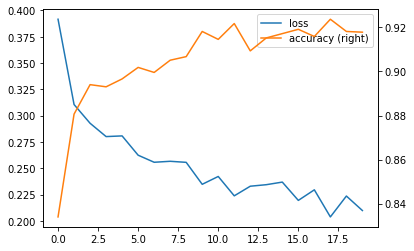

In [ ]:
print("\n--------chart---------")
result = pd.DataFrame.from_dict(history.history)
result.plot.line(secondary_y=["accuracy"])

In [ ]:
test_results = model.predict(Xtest)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

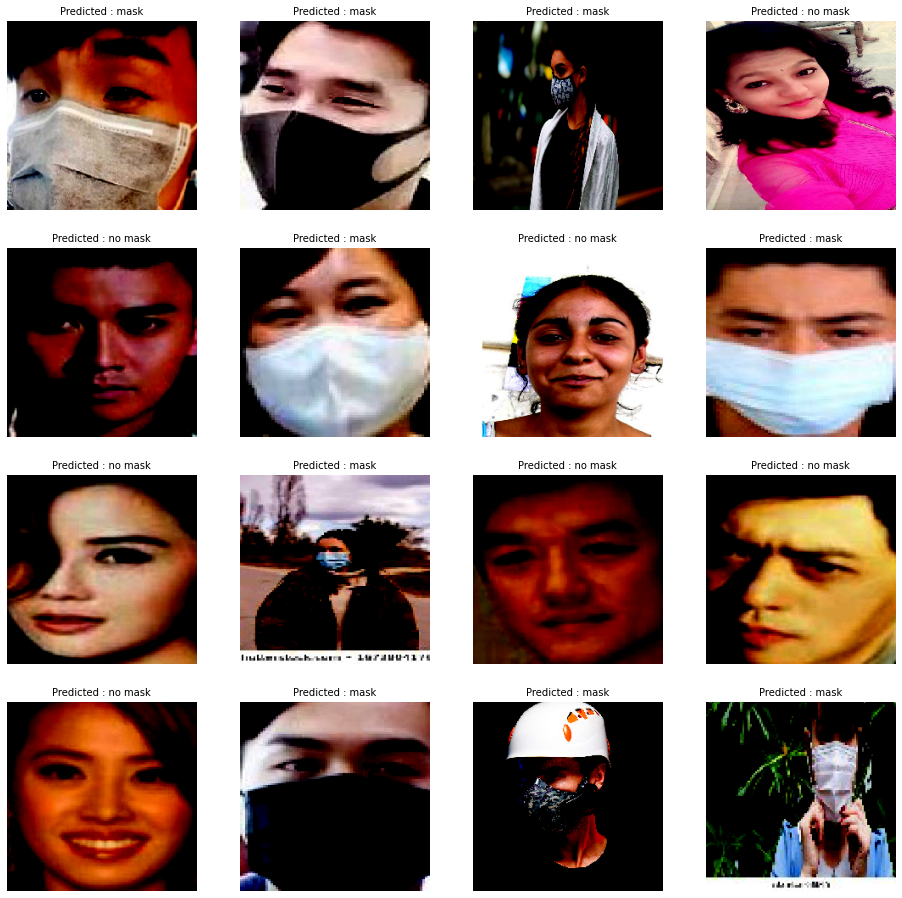

In [ ]:
nrows = 4
ncols = 4
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

for i in range(16):
  if test_results[i][0]>test_results[i][1]:
    prediction = "mask"
  else:
    prediction = "no mask"

  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  sp.set_title(f'Predicted : {prediction}', fontsize=10)
  plt.imshow(Xtest[i])
plt.show()

In [ ]:
%cd /content/drive/MyDrive/ML/
%ls

/content/drive/MyDrive/ML
FaceMask@         face_mask_CNN.ipynb  face_mask_Dense.ipynb
face_mask_CNN.h5  face_mask_Dense.h5


In [ ]:
model.save('face_mask_CNN.h5')